In [8]:
import imageio
from functools import partial
from scipy import misc
from scipy.ndimage import geometric_transform
import cmath
import matplotlib.pyplot as plt

In [9]:
def complex_transform(image, complex_function, coordinates):
    height = image.shape[0]
    width = image.shape[1]
    z = (coordinates[0] - height/2)/height + 1j * (coordinates[1] - width/2)/width
    w = complex_function(z)
    return (w.real*height + height/2, w.imag*width + width/2, coordinates[2])

def apply_transform(im, complex_function):
    partial_fn = partial(complex_transform, im, complex_function)
    return geometric_transform(im, partial_fn, mode='constant')
    

In [10]:
face = misc.face()

t = apply_transform(face, lambda z : complex('2+j')*z+complex('0.5-0.5j'))

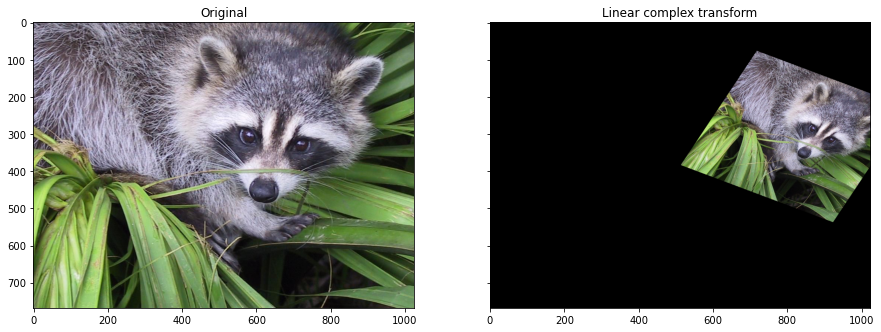

In [11]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,15))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs[0].title.set_text('Original')
axs[1].title.set_text('Linear complex transform')
axs[0].imshow(face)
axs[1].imshow(t)
plt.show()

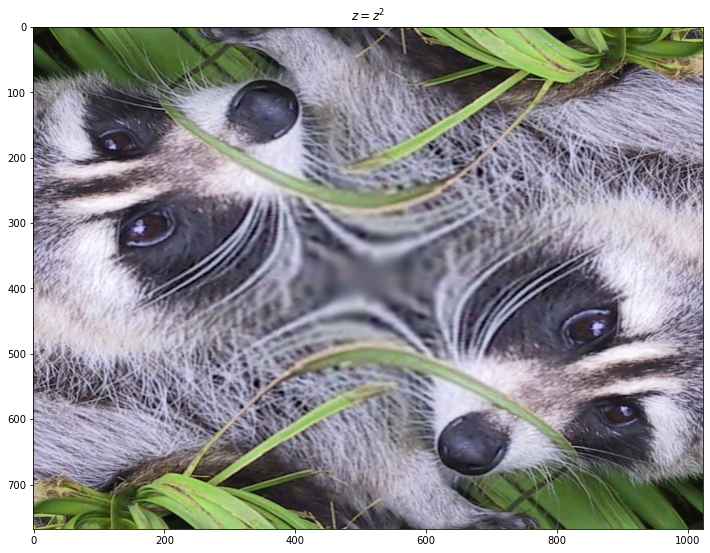

In [12]:
t = apply_transform(face, lambda z : z**2)
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(12,12))
fig.subplots_adjust(hspace=0)
axs.title.set_text(r'$z = z^2$')
axs.imshow(t)
plt.show()

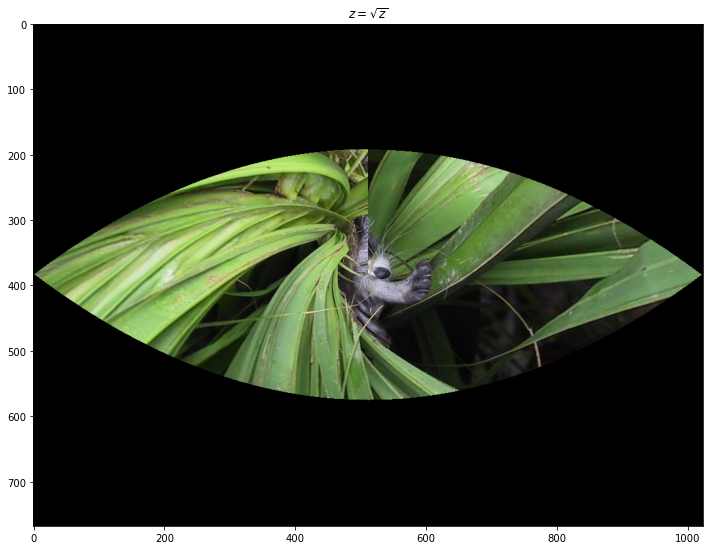

In [13]:
t = apply_transform(face, lambda z : z**0.5)
fig, axs = plt.subplots(1, 1, sharey=True, figsize=(12,12))
fig.subplots_adjust(hspace=0)
axs.title.set_text(r'$z = \sqrt{z}$')
axs.imshow(t)
plt.show()

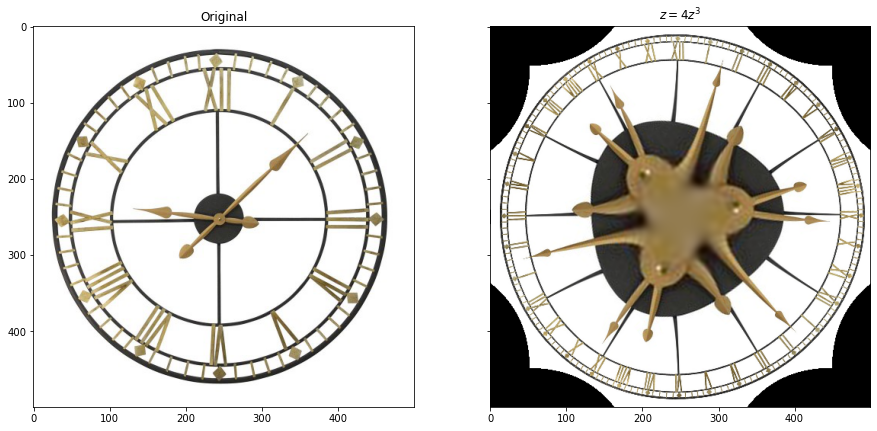

In [14]:
clock = imageio.imread('clock1.jpg')
t = apply_transform(clock, lambda z : 4*z**3)

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,15))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

axs[0].title.set_text('Original')
axs[1].title.set_text(r'$z = 4z^3$')
axs[0].imshow(clock)
axs[1].imshow(t)
plt.show()